## LLM

Large Language Models (LLMs) are powerful artificial intelligence systems that <br>are designed to understand and generate human-like text based on the input they <br>receive. These models are trained on vast amounts of data to learn patterns and<br> relationships within language, allowing them to generate coherent and contextually<br> relevant responses.

Large Language Models (LLMs) have gained significant popularity in recent years <br>due to their ability to generate human-like text and assist with a wide range of <br>language-related tasks. Several APIs (Application Programming Interfaces) are<br> available that allow developers to integrate LLMs into their applications or services.<br> Here are some notable LLM APIs:<br>


1.   OpenAI GPT-3.5 API
2.   HuggingFace Transformers API
3.   Google Cloud Natural Language API



In order to use OpenAI API, first we need to create account and generate personal API token.

## Setup

### Install necessary libraries

The "`tiktoken`" package is a Python library developed by OpenAI that provides <br>a tokenizer for various programming languages, including Python, JavaScript,<br> and more. It allows you to split code into individual tokens, which can be useful<br> for tasks like code analysis or generation.

"`wandb`" stands for Weights and Biases, which is a tool for visualizing and <br>tracking machine learning experiments. It provides a platform for experiment<br> management, tracking metrics, visualizing results, and collaborating with<br> team members.

In [ ]:
!pip install --upgrade openai tiktoken wandb -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.8 MB/s eta 0:00:00


### Import necessary packages

In [ ]:
import os
import openai
import tiktoken
import wandb
from pprint import pprint
from getpass import getpass
from wandb.integration.openai import autolog

 The `pprint` module in Python provides a way to *pretty-print* data structures,<br> making them more readable and visually appealing when printed to the <br>console or written to a file. It is particularly useful for printing nested data<br> structures like dictionaries, lists, and tuples.

The `getpass` module in Python provides a secure way to interactively prompt the user<br> for a password or other sensitive information without displaying it on the console.<br> It allows us to securely handle user input that should be kept private.

The `wandb.integration.openai` module provides integration between the Weights and Biases (wandb) <br>library and OpenAI's machine learning frameworks, such as TensorFlow and PyTorch. <br>Specifically, it includes the `autolog` function, which enables automatic logging<br> of experiment metrics, parameters, and model artifacts to Weights and Biases.

### Get the OpenAI API

In [ ]:
if openai.api_key is None:
  openai.api_key = getpass("Paste your OpenAI key from: https://platform.openai.com/account/api-keys\n")

assert openai.api_key.startswith("sk-"), "This doesn't look like a valid OpenAI API key"
print("OpenAI API key configured")

OpenAI API key configured


### Enable Weights and Biases autologging to track our experiments

In [ ]:
autolog({"project":"llmapps", "job_type":"introduction"})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Tokenization

Tokenization is the process of breaking down text into smaller units called tokens. <br>In the context of language models like GPT-3.5, tokenization refers to splitting input<br> text into discrete units that the model can understand and process. These tokens can<br> be individual characters, words, or even subwords, depending on the tokenization scheme used.

`tiktoken` uses BPE (Byte Pair Encoding).





` tiktoken.encoding_for_model()` is used to automatically load the correct encoding for a given model name.

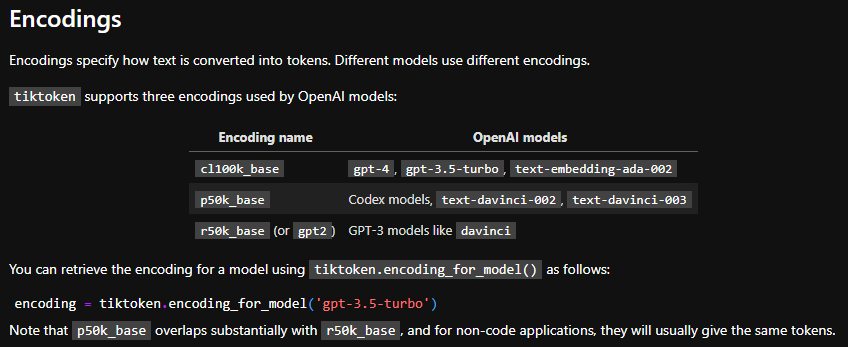<br>
*Source: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb*

Different models can have different tokenizers and here we are using tokenizer for "`text-davinci-003`" model.

In [ ]:
encoding = tiktoken.encoding_for_model("text-davinci-003")

In [ ]:
# Encoding the string
enc = encoding.encode("Weights and Biases is awesome!")
print(enc)

[1135, 2337, 290, 8436, 1386, 318, 7427, 0]


In [ ]:
# Decoding the encoded string
print(encoding.decode(enc))

Weights and Biases is awesome!


In [ ]:
# Decoding tokens one by one
for token_id in enc:
    print(f"{token_id}\t{encoding.decode([token_id])}")

1135	We
2337	ights
290	 and
8436	 Bi
1386	ases
318	 is
7427	 awesome
0	!


We also notice that some of the tokens also consist of spacing.

## Sampling

Sampling in Language Models (LLMs) refers to the process of generating text by randomly selecting words <br>or tokens from the model's output distribution.

The most basic sampling approach are:<br>
1. Greedy Decoding : argmax at each step
2. Beam Search : argmax over multiple candidate sequences

However, these approach do have limitations as it is hard to generate natural text using these methods.<br>
<br>
In order to make LLM's better, we use few other sampling techniques such as:<br><br>
1. **Temperature** - Temperature controls the randomness of the sampling process. A higher temperature (e.g., 1.0) increases randomness, leading to more diverse and unpredictable output. Conversely, a lower temperature (e.g., 0.5) makes the sampling process more deterministic, favoring high-probability tokens and generating more conservative output.<br><br>
2. **Top p sampling** - Top-p sampling, also known as nucleus sampling or probabilistic sampling, involves constraining the sampling process to the top-p most likely tokens at each step. This method helps avoid sampling from the entire vocabulary and focuses on a smaller subset of likely candidates. The value of p determines the number of tokens considered at each step. A smaller p leads to a more focused and deterministic output, while a larger p allows for more diversity.

### Temperature sampling

In [ ]:
def generate_with_temperature(temp):
  '''
  Generates text with a given temperature, higher temperature means more randomness
  '''
  response = openai.Completion.create(
      model = "text-davinci-003",
      prompt = "Say something about Weights and Biases",
      max_tokens = 50,
      temperature = temp
  )
  return response.choices[0].text

In [ ]:
for temp in [0, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]:
  pprint(f"TEMP : {temp}, GENERATION : {generate_with_temperature(temp)}")

('TEMP : 0, GENERATION : \n'
 '\n'
 'Weights and Biases is a powerful tool for tracking and analyzing machine '
 'learning experiments. It provides a comprehensive suite of features to help '
 'data scientists and engineers monitor, compare, and optimize their models. '
 'With its intuitive visualizations and automated logging,')
('TEMP : 0.25, GENERATION : \n'
 '\n'
 'Weights and Biases is an AI platform that helps data scientists and machine '
 'learning engineers track, compare, and optimize their models. It provides an '
 'intuitive dashboard to visualize and compare model performance, as well as '
 'tools to collaborate with colleagues and share')
('TEMP : 0.5, GENERATION : \n'
 '\n'
 'Weights and Biases is an AI platform that helps data scientists and machine '
 'learning engineers track, compare, and optimize their models. It provides a '
 'suite of tools to help users understand and improve their models, including '
 'logging, visualizing, and')
('TEMP : 1, GENERATION : \n'
 '\

### Top p sampling

In [ ]:
def generate_with_topp(topp):
  '''
  Generates text with a given temperature, higher temperature means more randomness
  '''
  response = openai.Completion.create(
      model = "text-davinci-003",
      prompt = "Say something about Weights and Biases",
      max_tokens = 50,
      top_p = topp
  )
  return response.choices[0].text

In [ ]:
for topp in [0, 0.01, 0.1, 0.25, 0.4, 0.5, 0.6, 0.8, 1]:
  pprint(f"TOP_P: {topp}, GENERATION : {generate_with_topp(topp)}")

('TOP_P: 0, GENERATION : \n'
 '\n'
 'Weights and Biases is a powerful tool for tracking and analyzing machine '
 'learning experiments. It provides a comprehensive suite of features to help '
 'data scientists and engineers monitor, compare, and optimize their models. '
 'With its intuitive visualizations and easy-to')
('TOP_P: 0.01, GENERATION : \n'
 '\n'
 'Weights and Biases is a powerful tool for tracking and analyzing machine '
 'learning experiments. It provides a comprehensive suite of features to help '
 'data scientists and engineers monitor, compare, and optimize their models. '
 'With its intuitive visualizations and easy-to')
('TOP_P: 0.1, GENERATION : \n'
 '\n'
 'Weights and Biases is a powerful tool for tracking and analyzing machine '
 'learning experiments. It provides a comprehensive suite of features to help '
 'data scientists and engineers monitor, compare, and optimize their models. '
 'With its intuitive visualizations and easy-to')
('TOP_P: 0.25, GENERATION : \n'


## Chat API

Let's explore the Chat API.<br>
For this, we will be using `gpt-3.5-turbo`.

In [ ]:
MODEL = "gpt-3.5-turbo"

response = openai.ChatCompletion.create(model = MODEL,
                                        messages = [
                                            {"role" : "system", "content" : "You are a helpful assistant."},
                                            {"role" : "user", "content" : "Say something about HuggingFace"}
                                        ],
                                        temperature = 0.2)

response

<OpenAIObject chat.completion id=chatcmpl-7VI9N701XvCLhfWVO4nQkgk0W1EW6 at 0x7f7d32000040> JSON: {
  "id": "chatcmpl-7VI9N701XvCLhfWVO4nQkgk0W1EW6",
  "object": "chat.completion",
  "created": 1687692293,
  "model": "gpt-3.5-turbo-0301",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "HuggingFace is a company that specializes in natural language processing (NLP) and provides a wide range of tools and libraries for developers to build and train NLP models. Their most popular library is Transformers, which is used for pre-training and fine-tuning state-of-the-art NLP models such as BERT, GPT-2, and RoBERTa. HuggingFace is also known for their open-source approach and community-driven development, making their tools accessible to a wide range of users."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 25,
    "completion_tokens": 101,
    "total_tokens": 126
  }
}

The response output is `chat.completion` openai object.

In [ ]:
pprint(response.choices[0].message.content)

('HuggingFace is a company that specializes in natural language processing '
 '(NLP) and provides a wide range of tools and libraries for developers to '
 'build and train NLP models. Their most popular library is Transformers, '
 'which is used for pre-training and fine-tuning state-of-the-art NLP models '
 'such as BERT, GPT-2, and RoBERTa. HuggingFace is also known for their '
 'open-source approach and community-driven development, making their tools '
 'accessible to a wide range of users.')


In [ ]:
wandb.finish()

usage/completion_tokens,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
usage/elapsed_time,▄▂▃▃▂▂▂▂▁▁▁▁▁▁▁▂▂█
usage/prompt_tokens,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
usage/total_tokens,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
usage/completion_tokens,101
usage/elapsed_time,4.86316
usage/prompt_tokens,25
usage/total_tokens,126


## Prompting

dive deeper on prompting the model by passing a better context by using available data from users questions and using the documentation files to generate better answers.

In [ ]:
!pip install -Uqqq rich tenacity

"`Tenacity`" is a Python package that provides a convenient way to add retry logic to your code. It is commonly used in scenarios where you want to automatically retry a function or a block of code when it encounters certain types of errors or failures.

In [ ]:
from rich.markdown import Markdown
import pandas as pd
from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential, # for exponential backoff
)
from wandb.integration.openai import autolog

## Generating synthetic support questions